# Main Jupyter Notebook: Code and comments are here. See "Stat Mech II PS I Written Answers" for discussion of graphs!

In [313]:
#Import statements
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [314]:
NH = 16 #length of the box
NW = 16 #width of the box
#Interval at which to save snapshots of the lattice if we want to automate the process.
savelat = 400

#This function initializes the initial lattice of spin-up or spin-down for our 2D ising model
def init():
    lat = np.zeros((NH,NW)) #the 2D lattice in which our magnetic spins sites will lie
    #Generate random spins for our lattice
    for i, ii in enumerate(lattice):
        for j, jj in enumerate(ii):
            lat[i,j] = 2 * np.random.randint(2) - 1
            
            
    return lat

#Test lattice initialization
latticestart = init()
print(latticestart)

[[ 1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.]
 [ 1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.]
 [ 1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]
 [ 1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1.]
 [ 1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.]
 [-1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1.]
 [-1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1.]
 [ 1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.]
 [-1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1.]
 [-1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.]
 [ 1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.]
 [-1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.]
 [ 1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1. 

In [315]:
#Function to do one monte carlo sweep. 
#Heavily inspired by the functions already given in the code provided to us [1].
def mc(lattice,temp):#lattice=2D Ising model spin lattice; temp = temperature kb*t
    beta = 1.0/float(temp)
    
    #Iterate over the total # spins in lattice and pick a random spin to see if we flip each time.
    #Heavy inspired by the acceptance parameters given to us in [1]
    for i in range(len(lattice)):
        for j in range(len(lattice[i])):
            x = np.random.randint(0,len(lattice[i]))
            y = np.random.randint(0,len(lattice))
            netspin = lattice[(y+1)%NH,x] + lattice[(y-1)%NH,x] + lattice[y,(x+1)%NW] + lattice[y,(x-1)%NW]
            change = 2*float(netspin)*lattice[y,x]
            if(change < 0):
                lattice[y,x] *= -1
            elif(rand() < np.exp(-beta*change)):
                lattice[y,x] *= -1
    return

#Function to calculate the avg magnetization normalized to the total number of spins
def mag(lattice):
    m = 0
    for i, ii in enumerate(lattice):
        for j, jj in enumerate(ii):
            m += lattice[i,j]
    m /= NH
    m /= NW
    return m

#Function to run the Monte Carlo for a specified # sweeps. 
#Also calcs avg magnetization at each timestep and returns it as an array
#(includes entire hostory, both during and after the burn-in time).
#Also plots the lattice at a specific set of data points.
def runallhist(eqts,mcts,temp):
    lattice = init()
    mags = []
    mags.append(mag(lattice))#To make sure we capture the initial config
    
    #Some parameters for plotting figures.
    f = plt.figure(figsize=(15, 15), dpi=80); 
    j = 0
    plotnum = 1
    
    for i, ii in enumerate(range(eqts)):
        mc(lattice,temp)#MC move
        mags.append(mag(lattice))#Save the magnetization of the current lattice
        #Plot snapshot before the equilibration
        if(j == 0):
            plotlat(f, lattice, j, plotnum);
            plotnum += 1
        
        if(j == 10):
            plotlat(f, lattice, j, plotnum);
            plotnum += 1
        
        if(j == 25):
            plotlat(f, lattice, j, plotnum);
            plotnum += 1
        
# Code below to automate lattice saving for plotting at a certain interval savelat.        
#         if(j%savelat == 0):
#             plotlat(f, lattice, j, plotnum);
#             plotnum += 1
        j += 1
    
    for i, ii in enumerate(range(mcts)):
        mc(lattice,temp)#MC move
        mags.append(mag(lattice))#Save the net magnetization of the current lattice
        #Plot snapshot after equilibration
        if(j == 1200):
            plotlat(f, lattice, j, plotnum);
            plotnum += 1
        
        if(j == 1500):
            plotlat(f, lattice, j, plotnum);
            plotnum += 1
        
        if(j == 1800):
            plotlat(f, lattice, j, plotnum);
            plotnum += 1
# Code below to automate lattice saving for plotting at a certain interval savelat.
#         if(j%savelat == 0):
#             plotlat(f, lattice, j, plotnum);
#             plotnum += 1
        j += 1
    
    plt.show()#plot the snapshots
    return mags#return the array of net magnetizations at different snapshots

#Plots the lattice along with the timestep # for a given timestep.
#Because I am not that familiar with plotting data, most of this was taken from the code in the link you gave us [1].
def plotlat(f, lattice, i, n_):
    X, Y = np.meshgrid(range(NW), range(NH))
    sp =  f.add_subplot(3, 3, n_ )  
    plt.setp(sp.get_yticklabels(), visible=False)
    plt.setp(sp.get_xticklabels(), visible=False)      
    plt.pcolormesh(X, Y, lattice, cmap=plt.cm.RdBu);
    plt.title('Time=%d'%i); plt.axis('tight')    
    return

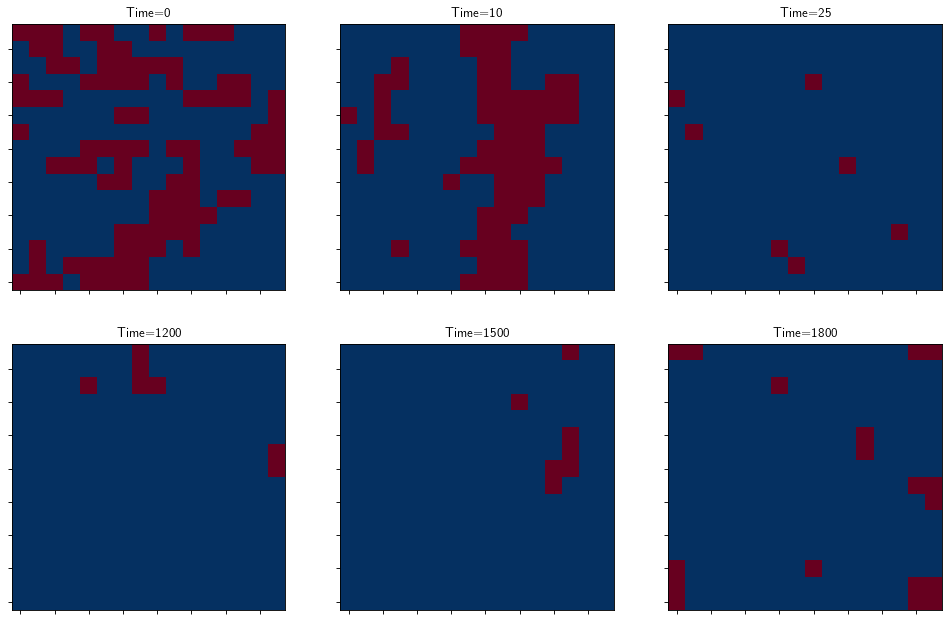

In [316]:
#Run MC simulation for T = 2 J/kB
T = 2
eqtime = 1024
mctime = 1024

dataN16T2 = runallhist(eqtime,mctime,T)

Text(0, 0.5, 'Net Magnetization')

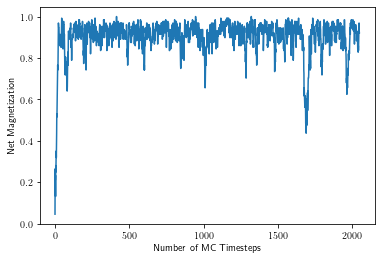

In [317]:
#Plot net magnetization for T = 2 J/kB
plt.plot(dataN16T2)
plt.xlabel('Number of MC Timesteps')
plt.ylabel('Net Magnetization')

(0.0, 200.0)

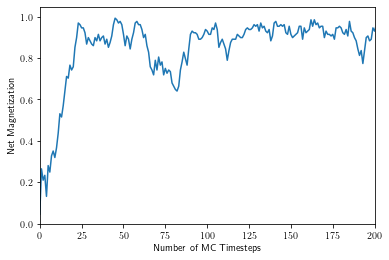

In [318]:
#Zoom in on earlier part of plot of net magnetization to find "burn-in time"
plt.plot(dataN16T2)
plt.xlabel('Number of MC Timesteps')
plt.ylabel('Net Magnetization')
plt.xlim(0,200)

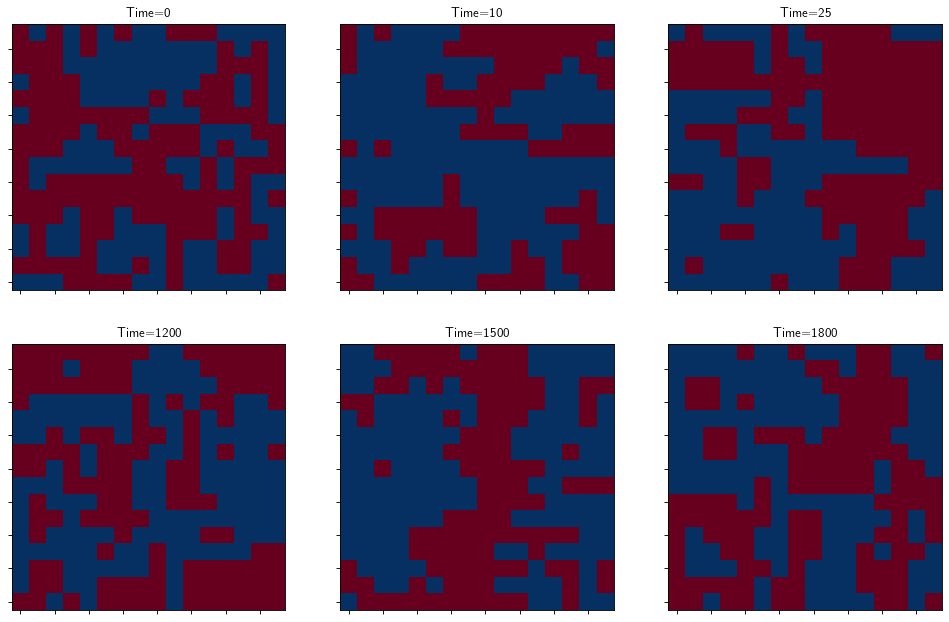

In [323]:
#Run MC simulation for T = 3 J/kB
T = 3
eqtime = 1024
mctime = 1024

dataN16T3 = runallhist(eqtime,mctime,T)

Text(0, 0.5, 'Average Magnetization')

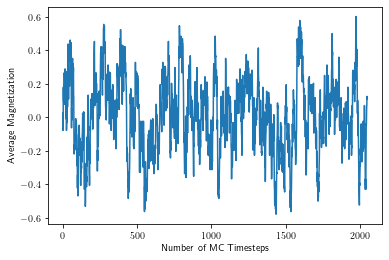

In [324]:
#Plot net magnetization for T = 3 j/kB
plt.plot(dataN16T3)
plt.xlabel('Number of MC Timesteps')
plt.ylabel('Average Magnetization')

In [328]:
tnum = 101 #number of temperature points
eqtime = 1024
mctime = 1024
trange = np.linspace(1.769,2.769,tnum)#List containing temps for our calcs

print(trange)#Show the temps we will test

#Function to do a Monte Carlo run
#Returns total average magnetization and total average sq magnetization
def runeqhist(eqts,mcts,temp):
    lattice = init()#initialize lattice
    m = 0.0 #The total average magnetization over all timesteps
    m2 = 0.0 #The total average square magnetization over all timesteps
    
    #Let lattice equilibrate
    for i, ii in enumerate(range(eqts)):
        mc(lattice,temp)
    
    #Monte Carlo run; collect magnetization data here
    for i, ii in enumerate(range(mcts)):
        mc(lattice,temp)
        currm = mag(lattice)
        m += currm
        m2 += currm*currm
    
    m /= float(mcts)#normalize to the number of timesteps
    m2 /= float(mcts)#normalize to the number of timesteps
    
    return m, m2

#Function to sweep across a variety of temps and do calcs for each temp and stores data in list
#Calcs the total avg m's, the total avg sq m's, and the magnetic susceptibilities
def tempsweep(temps):
    mags = []#total avg m's
    mags2 = []#total avg sq m's
    suss = []#magnetic susceptibilities
    
    #Sweeps temps
    for t in temps:
        tempdata = runeqhist(eqtime,mctime,t)
        mags.append(abs(tempdata[0]))#Store absolute value of current total avg m
        mags2.append(tempdata[1])#Store current total avg sq m
        currsus = (tempdata[1] - tempdata[0] * tempdata[0]) / t#calc magnetic susceptibility
        suss.append(currsus)#Store magnetic susceptibilities
        print(t)#print the current temp to give indication of how far we progressed
    
    return mags,mags2,suss#return data in tuple

[1.769 1.779 1.789 1.799 1.809 1.819 1.829 1.839 1.849 1.859 1.869 1.879
 1.889 1.899 1.909 1.919 1.929 1.939 1.949 1.959 1.969 1.979 1.989 1.999
 2.009 2.019 2.029 2.039 2.049 2.059 2.069 2.079 2.089 2.099 2.109 2.119
 2.129 2.139 2.149 2.159 2.169 2.179 2.189 2.199 2.209 2.219 2.229 2.239
 2.249 2.259 2.269 2.279 2.289 2.299 2.309 2.319 2.329 2.339 2.349 2.359
 2.369 2.379 2.389 2.399 2.409 2.419 2.429 2.439 2.449 2.459 2.469 2.479
 2.489 2.499 2.509 2.519 2.529 2.539 2.549 2.559 2.569 2.579 2.589 2.599
 2.609 2.619 2.629 2.639 2.649 2.659 2.669 2.679 2.689 2.699 2.709 2.719
 2.729 2.739 2.749 2.759 2.769]


In [329]:
#Run the temperature sweep, printing the temperatures that were successfully swept
tdataN16 = tempsweep(trange)

1.769
1.779
1.789
1.799
1.809
1.819
1.829
1.839
1.849
1.859
1.869
1.879
1.889
1.899
1.9089999999999998
1.919
1.9289999999999998
1.939
1.9489999999999998
1.9589999999999999
1.9689999999999999
1.9789999999999999
1.9889999999999999
1.9989999999999999
2.009
2.019
2.029
2.039
2.049
2.059
2.069
2.0789999999999997
2.089
2.099
2.109
2.1189999999999998
2.129
2.139
2.149
2.159
2.169
2.179
2.189
2.199
2.209
2.219
2.229
2.239
2.249
2.259
2.269
2.279
2.289
2.299
2.309
2.319
2.3289999999999997
2.339
2.349
2.359
2.3689999999999998
2.379
2.3890000000000002
2.399
2.409
2.419
2.4290000000000003
2.439
2.449
2.459
2.4690000000000003
2.479
2.489
2.499
2.509
2.519
2.529
2.539
2.549
2.559
2.569
2.579
2.589
2.599
2.609
2.619
2.629
2.6390000000000002
2.649
2.659
2.669
2.6790000000000003
2.689
2.699
2.709
2.7190000000000003
2.729
2.739
2.749
2.7590000000000003
2.769


Text(0, 0.5, 'Total Average Magnetization')

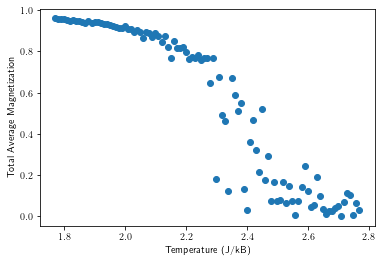

In [330]:
plt.scatter(trange,tdataN16[0])
plt.xlabel('Temperature (J/kB)')
plt.ylabel('Total Average Magnetization')

Text(0, 0.5, 'Total Average Square Magnetization')

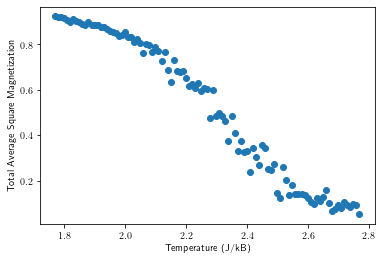

In [331]:
plt.scatter(trange,tdataN16[1])
plt.xlabel('Temperature (J/kB)')
plt.ylabel('Total Average Square Magnetization')

Text(0, 0.5, 'Magnetic Susceptibility')

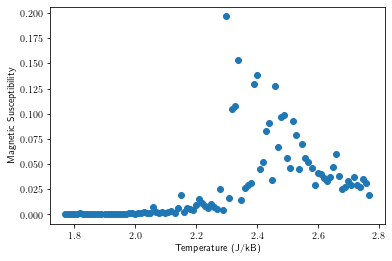

In [332]:
plt.scatter(trange,tdataN16[2])
plt.xlabel('Temperature (J/kB)')
plt.ylabel('Magnetic Susceptibility')

[1]	Singh, R. Ising Model. https://rajeshrinet.github.io/blog/2014/ising-model/ (accessed Feb 5, 2023). 